In [1]:
# prerequisites
import os
import torch
import time
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from models import SITE
from utils import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
# path to the dataset
dataset_path = '../data'

# path to the model weights
model_path = './models/CIFAR'

batch_size = 20

Transform = transforms.Compose(
    [transforms.Resize((128,128)),
     transforms.ToTensor(),
     transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                          std = [0.229, 0.224, 0.225])])

valset = torchvision.datasets.CIFAR10(root=dataset_path, train=False,
                                       download=True, transform=Transform)
val_loader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=False, num_workers=2, drop_last = True)

In [4]:
site = SITE().to(device)
site.backbone.load_state_dict(torch.load(os.path.join(model_path, 'backbone'), map_location=device))
site.site.load_state_dict(torch.load(os.path.join(model_path, 'site'), map_location=device))
site.eval()
print(f'Models are properly loaded! There are totally {get_n_params(site)} parameters.')

Models are properly loaded! There are totally 7819592 parameters.


In [5]:
# initialize the iterator
it = iter(val_loader)

Original images:


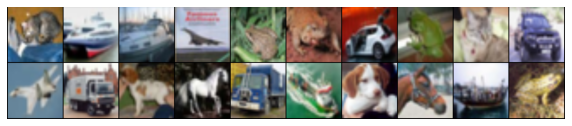

In [6]:
# get original images
image, label = it.next()
image, label = image.to(device), label.to(device)

print("Original images:")
imshow(denorm(image))

Transformed images:


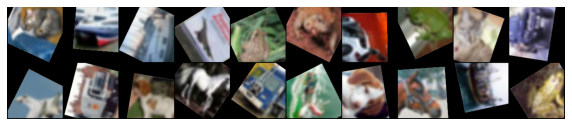

In [7]:
## transformed images
theta = get_theta(batch_size)
t_image = transform(image, theta)

print("Transformed images:")
imshow(denorm(t_image))

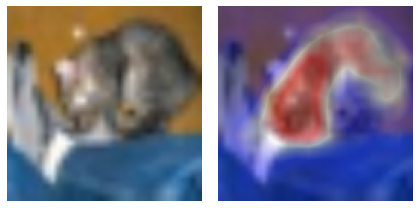

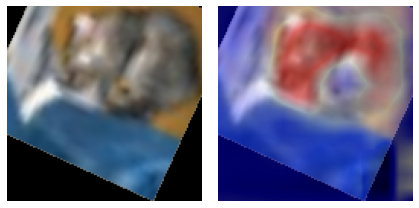

In [8]:
# image id in the batch
image_id = 0
img = image[image_id][None]
t_img = t_image[image_id][None]

# explanations for the original and transformed images
explanation = site.get_explanation(img, target_class = label[image_id])
t_explanation = site.get_explanation(t_img, target_class = label[image_id])

# plot the explanations
plot_explanation(img, explanation)
plot_explanation(t_img, t_explanation)